<a href="https://colab.research.google.com/github/msesma/Qiskit/blob/main/ExercisesChp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-smscdvfg
  Running command git clone -q https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-smscdvfg
     |████████████████████████████████| 8.5MB 4.1MB/s 
     |████████████████████████████████| 17.6MB 239kB/s 
     |████████████████████████████████| 204kB 41.0MB/s 
     |████████████████████████████████| 204kB 41.9MB/s 
     |████████████████████████████████| 2.1MB 34.6MB/s 
     |████████████████████████████████| 1.3MB 33.0MB/s 
     |████████████████████████████████| 5.9MB 22.6MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 194kB 47.6MB/s 
     |████████████████████████████████| 81kB 9.5MB/s 
     |████████████████████████████████| 614kB 40.0MB/s 
     |████████████████████████████████| 102kB 11.2MB/s 
     |████████████████████████████████| 2.6MB 30.8MB/s 
     |████████████████████████████████| 5.5MB 34.5MB/s 
  Created

In [2]:
from qiskit import *
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram

Multiple Qubits and Entangled States

In [3]:
qc = QuantumCircuit(3)
# Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)
# See the circuit:
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘

In [4]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit_textbook.tools import array_to_latex
array_to_latex(final_state, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>

In [5]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

In [6]:
backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,backend).result().get_unitary()
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(unitary) instead.
from qiskit_textbook.tools import array_to_latex
array_to_latex(unitary, pretext="\\text{Circuit = }\n")

<IPython.core.display.Math object>

In [13]:
# Simulate the unitary
backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,backend).result().get_unitary()
# Display the results:
array_to_latex(unitary, pretext="\\text{Circuit = } ")

<IPython.core.display.Math object>

In [8]:
qc = QuantumCircuit(2)
# Apply CNOT
qc.cx(0,1)
# See the circuit:
qc.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

In [10]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
qc.draw()


┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────

In [11]:
# Let's see the result:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

In [14]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [15]:
# Let's see the result:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

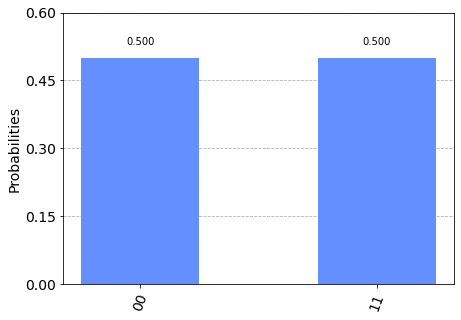

In [16]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)